# Loan application status prediction

Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

In [14]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dadaset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#  Exploration Data Analysis

In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observations:
We notice two columns namely (ApplicantIncome & CoapplicantIncome) which could be combined and named the toital income for the applicant

In [16]:
# Combining two columns (ApplicantIncome & CoapplicantIncome) to form a new column named (TotalIncome)
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [10]:
def missing_data(data):
    percentage_missing = data.isnull().sum()*100/len(data)
    data_types= data.dtypes
    missing_values = pd.DataFrame({"data_types": data_types,
                                  "%_missing": percentage_missing})
    return missing_values

missing_data(df)

,data_types,%_missing
Loan_ID,object,0.0
Gender,object,0.0
Married,object,0.0
Dependents,object,0.0
Education,object,0.0
Self_Employed,object,0.0
ApplicantIncome,int64,0.0
CoapplicantIncome,float64,0.0
LoanAmount,object,0.0
Loan_Amount_Term,object,0.0


In [9]:
#Replace missing values - categorical variables
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

In [17]:
#Replace missing values - numerical variables
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean)
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean)

df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

Resolving the missing value in the dataset
we opt for using mode of the categorical columns and mean for numeric columns to replace the missing values

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.dtypes

All null values have been replaced as seen in the output above

<Axes: >

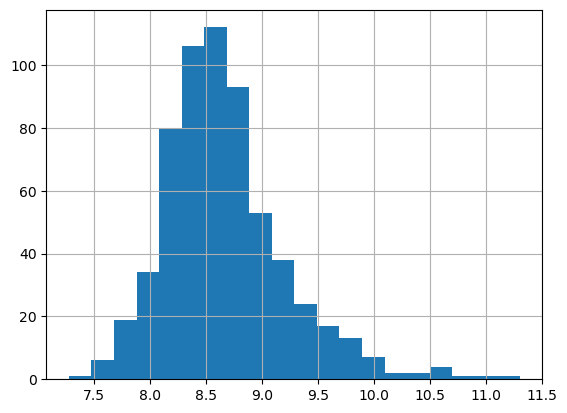

In [18]:
# The distribution of TotalIncome in histgram
df['TotalIncome_log']= np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [19]:
#Basic statistics for numerica variables
df.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,TotalIncome,TotalIncome_log
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,0.855049,7024.705081,8.669414
std,6109.041673,2926.248369,0.352339,6458.663872,0.545102
min,150.000000,0.000000,0.000000,1442.000000,7.273786
25%,2877.500000,0.000000,1.000000,4166.000000,8.334712
50%,3812.500000,1188.500000,1.000000,5416.500000,8.597205
75%,5795.000000,2297.250000,1.000000,7521.750000,8.925549
max,81000.000000,41667.000000,1.000000,81000.000000,11.302204


In [20]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      502
Female    112
Name: Gender, dtype: int64


Yes    401
No     213
Name: Married, dtype: int64


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     532
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        NaN\n1      128.0\n2       66.0\n3      120.0\n4   

In [21]:
#Drop Loan_ID and LoanAmount
df1 = df.drop('Loan_ID', axis=1)
df1  = df.drop('LoanAmount', axis=1)

In [22]:
df1.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y,6000.0,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,360.0,1.0,Urban,Y,9613.0,9.170872
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,360.0,1.0,Urban,Y,3849.0,8.255569
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,360.0,0.0,Semiurban,N,5540.0,8.619750
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,360.0,1.0,Urban,Y,5532.0,8.618305
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,360.0,1.0,Semiurban,N,23809.0,10.077819


In [23]:
#Basic statistics/distribution for non-numerical/categorical variables
df1.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.0,614,614
unique,614,2,2,4,2,2,11.0,3,2
top,LP001002,Male,Yes,0,Graduate,No,360.0,Semiurban,Y
freq,1,502,401,360,480,532,512.0,233,422


In [24]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [25]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [27]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [28]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [30]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

# Visualizations

Number of Customers that take loan by Gender:
Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

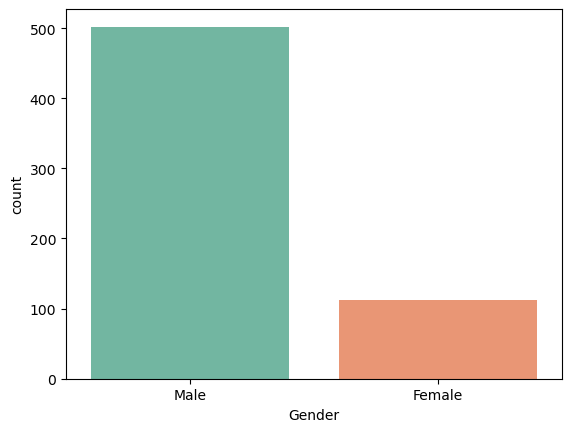

In [31]:
# Gender
print("Number of Customers that take loan by Gender:")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette = 'Set2')

Number of Customers that take loan grouoed by Marital Status:
Yes    401
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

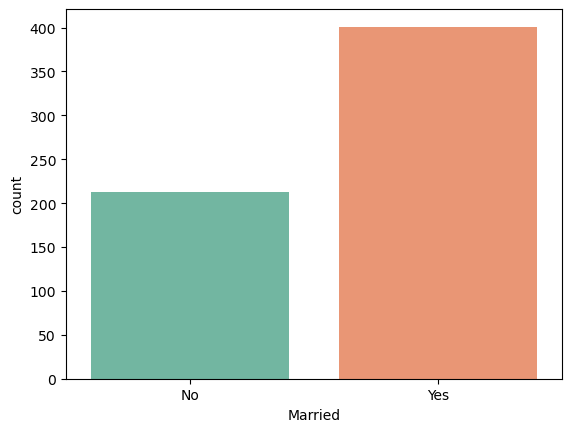

In [32]:
# Married
print("Number of Customers that take loan grouoed by Marital Status:")
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df, palette = 'Set2')

Number of Customers that take loan grouped by No of Dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

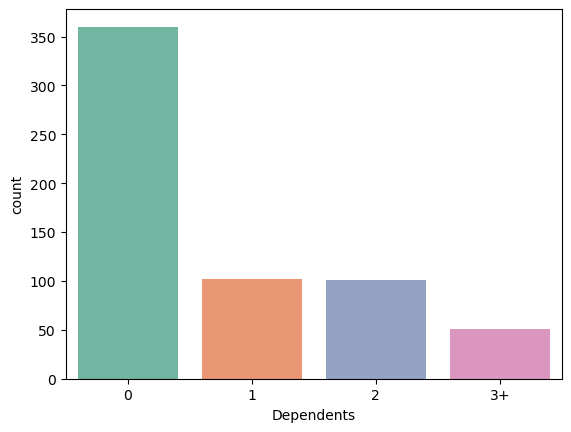

In [33]:
# Dependents
print("Number of Customers that take loan grouped by No of Dependents:")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data=df, palette = 'Set2')

Number of Customers that take loan grouoed by Education:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

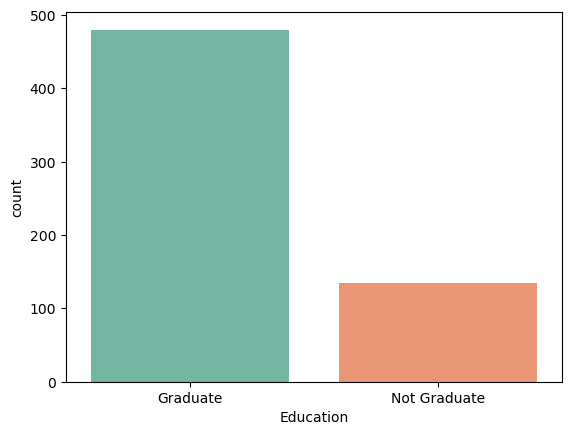

In [34]:
#Education
print("Number of Customers that take loan grouoed by Education:")
print(df['Education'].value_counts())
sns.countplot(x='Education', data=df, palette = 'Set2')

Number of Customers that take loan grouoed by Self_Employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

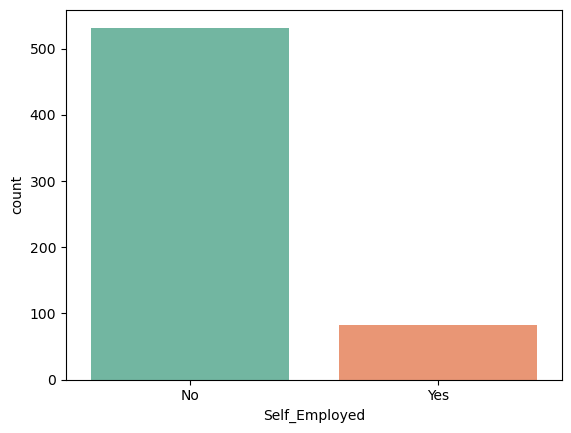

In [35]:
#Self_Employed
print("Number of Customers that take loan grouoed by Self_Employed:")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=df, palette = 'Set2')

Number of Customers that take loan grouoed by Property_Area:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<Axes: xlabel='Property_Area', ylabel='count'>

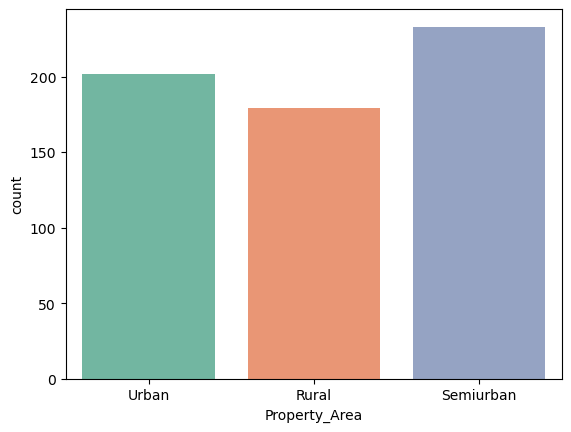

In [36]:
#Property_Area
print("Number of Customers that take loan grouoed by Property_Area:")
print(df['Property_Area'].value_counts())
sns.countplot(x='Property_Area', data=df, palette = 'Set2')

Number of Customers that take loan grouped by Credit_History: 
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

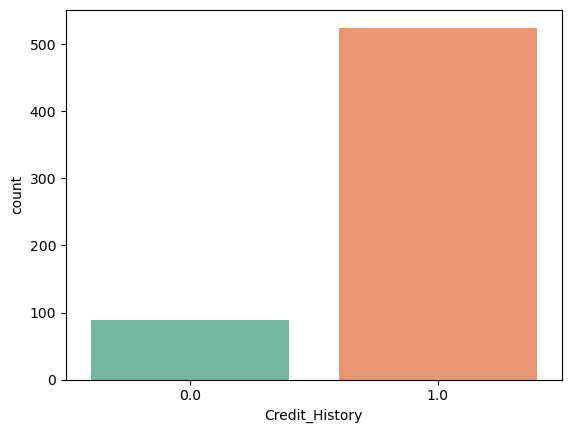

In [37]:
#LoanAmount
print("Number of Customers that take loan grouped by Credit_History: ")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=df, palette = 'Set2')

# Model development

Pre-processing and Encoding categorical columns(variables) for better analysis

In [38]:
#Replace the value in Dependents column
df1['Dependents'] =df1['Dependents'].replace(to_replace="3+",value='4')

In [39]:
df1['Dependents'].unique()

array(['0', '1', '2', '4'], dtype=object)

In [40]:
df1['Gender'] = df1['Gender'].map({'Male':1, 'Female':0}).astype(int)
df1['Married'] = df1['Married'].map({'No':0, 'Yes':1}).astype(int)
df1['Education'] = df1['Education'].map({'Graduate':1, 'Not Graduate':0}).astype(int)
df1['Self_Employed'] = df1['Self_Employed'].map({'Yes':0, 'No':1}).astype(int)
df1['Property_Area'] = df1['Property_Area'].map({'Urban': 2, 'Semiurban':1, 'Rural':0}).astype(int)
df1['Loan_Status'] = df1['Loan_Status'].map({'Y':1, 'N':0}).astype(int)

In [41]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,1,1,5849,0.0,360.0,1.0,2,1,5849.0,8.674026
1,LP001003,1,1,1,1,1,4583,1508.0,360.0,1.0,0,0,6091.0,8.714568
2,LP001005,1,1,0,1,0,3000,0.0,360.0,1.0,2,1,3000.0,8.006368
3,LP001006,1,1,0,0,1,2583,2358.0,360.0,1.0,2,1,4941.0,8.505323
4,LP001008,1,0,0,1,1,6000,0.0,360.0,1.0,2,1,6000.0,8.699515


In [42]:
#Drop Loan_ID 
df1 = df1.drop('Loan_ID', axis=1)

In [43]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,1,0,0,1,1,5849,0.0,360.0,1.0,2,1,5849.0,8.674026
1,1,1,1,1,1,4583,1508.0,360.0,1.0,0,0,6091.0,8.714568
2,1,1,0,1,0,3000,0.0,360.0,1.0,2,1,3000.0,8.006368
3,1,1,0,0,1,2583,2358.0,360.0,1.0,2,1,4941.0,8.505323
4,1,0,0,1,1,6000,0.0,360.0,1.0,2,1,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,1,2900,0.0,360.0,1.0,0,1,2900.0,7.972466
610,1,1,4,1,1,4106,0.0,180.0,1.0,0,1,4106.0,8.320205
611,1,1,1,1,1,8072,240.0,360.0,1.0,2,1,8312.0,9.025456
612,1,1,2,1,1,7583,0.0,360.0,1.0,2,1,7583.0,8.933664


In [70]:
df1['LoanAmount'] = pd.to_numeric(df1['LoanAmount'], errors='coerce')
df1['Loan_Amount_Term'] = pd.to_numeric(df1['Loan_Amount_Term'], errors='coerce')

In [106]:
#Correlation matrix
corr = df1.corr()
corr

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,LoanAmount
Gender,1.000000,0.364569,-0.045364,0.000525,0.058809,0.082912,-0.073567,0.009170,-0.025752,0.017987,0.093191,0.167285,0.107930
Married,0.364569,1.000000,-0.012304,-0.004489,0.051708,0.075948,-0.100863,0.010938,0.004257,0.091478,0.083319,0.151527,0.147141
Education,-0.045364,-0.012304,1.000000,-0.010383,0.140760,0.062290,0.077242,0.073658,0.065243,0.085884,0.161362,0.204861,0.166998
Self_Employed,0.000525,-0.004489,-0.010383,1.000000,-0.127180,0.016100,0.033943,0.001550,0.030860,0.003700,-0.113000,-0.176709,-0.115260
ApplicantIncome,0.058809,0.051708,0.140760,-0.127180,1.000000,-0.116605,-0.045242,-0.018615,-0.009500,-0.004710,0.893037,0.717829,0.565620
CoapplicantIncome,0.082912,0.075948,0.062290,0.016100,-0.116605,1.000000,-0.059675,0.011134,0.010522,-0.059187,0.342781,0.383827,0.187828
Loan_Amount_Term,-0.073567,-0.100863,0.077242,0.033943,-0.045242,-0.059675,1.000000,0.000432,-0.077620,-0.020974,-0.069830,-0.055320,0.038801
Credit_History,0.009170,0.010938,0.073658,0.001550,-0.018615,0.011134,0.000432,1.000000,0.001963,0.540556,-0.012563,0.020791,-0.001431
Property_Area,-0.025752,0.004257,0.065243,0.030860,-0.009500,0.010522,-0.077620,0.001963,1.000000,0.032112,-0.004218,-0.046246,-0.044776
Loan_Status,0.017987,0.091478,0.085884,0.003700,-0.004710,-0.059187,-0.020974,0.540556,0.032112,1.000000,-0.031271,0.007240,-0.036416


<Axes: >

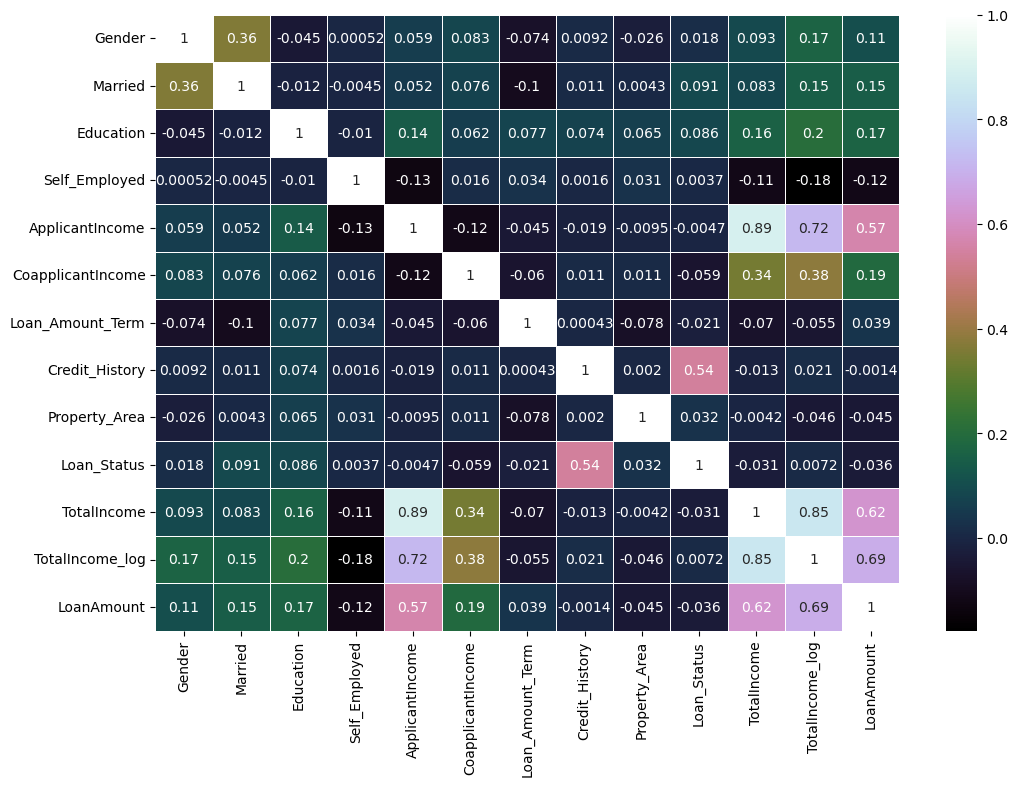

In [105]:
#Correlation among the numerical features
plt.subplots(figsize=(12,8))
sns.heatmap(df1.corr(),cmap='cubehelix',annot=True, linewidth=.5)

In [71]:
#Spliting the varaiables in x and y for the model, remove columns with low correlations(region)
x = df1.drop(['Loan_Status', 'ApplicantIncome', 'CoapplicantIncome'], axis=1)
y = df1.Loan_Status

In [72]:
x

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,TotalIncome_log,LoanAmount
0,1,0,0,1,1,360.0,1.0,2,5849.0,8.674026,146.412162
1,1,1,1,1,1,360.0,1.0,0,6091.0,8.714568,128.000000
2,1,1,0,1,0,360.0,1.0,2,3000.0,8.006368,66.000000
3,1,1,0,0,1,360.0,1.0,2,4941.0,8.505323,120.000000
4,1,0,0,1,1,360.0,1.0,2,6000.0,8.699515,141.000000
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,1,360.0,1.0,0,2900.0,7.972466,71.000000
610,1,1,4,1,1,180.0,1.0,0,4106.0,8.320205,40.000000
611,1,1,1,1,1,360.0,1.0,2,8312.0,9.025456,253.000000
612,1,1,2,1,1,360.0,1.0,2,7583.0,8.933664,187.000000


In [73]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [74]:
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean(), inplace=True)
df1['TotalIncome_log'].fillna(df1['TotalIncome_log'].mean(), inplace=True)
df1['LoanAmount'].fillna(df1['LoanAmount'].mean(), inplace=True)

In [75]:
df1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
TotalIncome_log      0
LoanAmount           0
dtype: int64

In [76]:
# spliting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [77]:
print(x.shape, x_train.shape, y_test.shape)

(614, 11) (491, 11) (123,)


In [78]:
# The problem is of classification and thus, the following models are being used to answer the problem statement
# logistic regression
# Random Forest
# Decision Tree
# Support Vector Machines

# Importing required libraries for the Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [79]:
# logistic regression
LR = LogisticRegression()

In [80]:
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8292682926829268
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [107]:
# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(x_train, y_train)
predRandFor = RandFor.predict(x_test)
print(accuracy_score(y_test,predRandFor))
print(confusion_matrix(y_test,predRandFor))
print(classification_report(y_test,predRandFor))

0.8292682926829268
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [110]:
# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(x_train, y_train)
predDecTree = DecTree.predict(x_test)
print(accuracy_score(y_test,predDecTree))
print(confusion_matrix(y_test,predDecTree))
print(classification_report(y_test,predDecTree))

0.6178861788617886
[[20 13]
 [34 56]]
              precision    recall  f1-score   support

           0       0.37      0.61      0.46        33
           1       0.81      0.62      0.70        90

    accuracy                           0.62       123
   macro avg       0.59      0.61      0.58       123
weighted avg       0.69      0.62      0.64       123



In [111]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(x_train,y_train)
predsvmMod = svmMod.predict(x_test)
print(accuracy_score(y_test,predsvmMod))
print(confusion_matrix(y_test,predsvmMod))
print(classification_report(y_test,predsvmMod))

0.7317073170731707
[[ 0 33]
 [ 0 90]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.73      1.00      0.85        90

    accuracy                           0.73       123
   macro avg       0.37      0.50      0.42       123
weighted avg       0.54      0.73      0.62       123



In [114]:
# Use the trained model to make predictions on the test data
predict_test = RandFor.predict(x_test)
predict_test

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [116]:
 #Create a DataFrame with the test dataset and predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': predRandFor})
results

,Actual,Predicted
454,1,1
52,0,1
536,1,1
469,0,1
55,1,1
...,...,...
337,1,1
376,1,1
278,1,1
466,0,0


In [117]:
# To convert loan status variable back to original categorial values of Yes or No
# Map numerical predictions back to "Yes" and "No" categories
predRandFor_category = ['Yes' if pred == 1 else 'No' for pred in predRandFor]

# Create a DataFrame with the test dataset and converted predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': predRandFor_category})
results

,Actual,Predicted
454,1,Yes
52,0,Yes
536,1,Yes
469,0,Yes
55,1,Yes
...,...,...
337,1,Yes
376,1,Yes
278,1,Yes
466,0,No


In [118]:
# Save the DataFrame as a CSV file
results.to_csv('Loan Application Status Prediction.csv', index=False)

In [119]:
# saving the model using .pkl
import joblib
joblib.dump(RandFor, "Loan Application Status Prediction.pkl")

['Loan Application Status Prediction.pkl']

# End